In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Integer, Real
from skopt.utils import use_named_args

from data_and_regressor import get_data

Best parameters:
- max_depth=4
- learning_rate=0.100376
- max_features=13
- min_samples_split=100
- min_samples_leaf=1


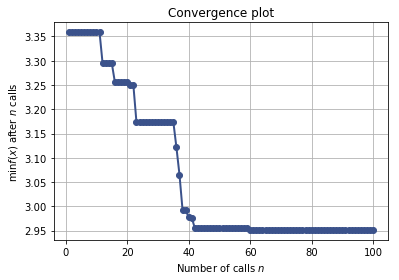

In [2]:
X, y, n_features = get_data()
# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space = [
    Integer(1, 5, name="max_depth"),
    Real(10 ** -5, 10 ** 0, "log-uniform", name="learning_rate"),
    Integer(1, n_features, name="max_features"),
    Integer(2, 100, name="min_samples_split"),
    Integer(1, 100, name="min_samples_leaf"),
]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
    reg.set_params(**params)

    return -np.mean(
        cross_val_score(reg, X, y, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")
    )


res_gp = gp_minimize(objective, space, n_calls=100, random_state=0)


print(
    """Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d"""
    % (res_gp.x[0], res_gp.x[1], res_gp.x[2], res_gp.x[3], res_gp.x[4])
)


plot_convergence(res_gp)